In [ ]:
# WORKING OF SIGMOID FUNCTION

import numpy as np
from sklearn.linear_model import LogisticRegression
# Step 2: Create the dataset
X = np.array([[1], [2], [3], [4], [5], [6]]) # hours studied  --> INDEPENDENT VARIABLE
y = np.array([0, 0, 0, 1, 1, 1]) # passed or not              --> DEPENDENT VARIABLE
# Step 3: Create and train the model
model = LogisticRegression()
model.fit(X, y)



LogisticRegression()

In [ ]:
# LOGISTIC REGRESSION PROVIDES YOU A PROBABBILITY
# HOW LOGISTIC REGRESSION CALCULATES THIS PROBABBILITY

# Step 4: Get the learned parameters
a = model.coef_[0][0] # slope
b = model.intercept_[0] # intercept
print(f"a (slope): {a}")
print(f"b (intercept): {b}")
# a = 1.12 means the model thinks “hours studied” strongly affects the chance of passing.
# If we had a = 0.2, the effect would be much weaker.
# b = -3.9 means a student who studies very few hours has a very low chance of passing.


a (slope): 1.1206952510393666
b (intercept): -3.9223038967769632


In [ ]:
# LETS CALCULATE THIS X
a= 1.1207
b = -3.9223
x = 3.5
score = a* x +b


print(score)

0.0001500000000000945


In [ ]:

#Let's calculate e raise to the power of score

import math
math.e

s = math.e**(-score)
print(s)

0.9998500112494374


In [ ]:
# Sigmoid function

prob = 1/(1+s)
print(prob)

0.5000374999999297


In [ ]:
# LETS CALCULATE if a student is going to study 5.5 hours
x = 5.5
score = a* x +b
s = math.e**(-score)
prob = 1/(1+s)
print(prob)

0.9039191590301654


In [ ]:
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# load the dataset

# when using google colab, need to use this 2 lines of code

from google.colab import files
upload = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x = data.drop("Outcome", axis=1) # axis =1 means column
x = x.values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y = data.Outcome.values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
# split the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Logistic Regression provides PROBABILITY not the outcome
y_prob = log_reg.predict_proba(x_test)[:,1]

In [ ]:
# now find the outcome
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_table = pd.DataFrame({"Actual":y_test, "Probability":y_prob, "Predicted":y_pred})
y_table

,Actual,Probability,Predicted
0,0,0.275872,0
1,0,0.188441,0
2,0,0.114488,0
3,0,0.163544,0
4,0,0.471528,0
...,...,...,...
149,1,0.750843,1
150,0,0.118632,0
151,0,0.485576,0
152,1,0.225149,0


In [ ]:
# CONFUSION MATRIX
# IS USED TO EVALUATE THE MODEL PERFORMANCE OF A CLASSIFICATION ALGORITHM
# IT WILL TELL YOU HOW MANY TIMES YOUR ML MODEL MAKES GOOD PREDICTIONS
# HOW MANY TIMES YOUR ML MODEL MAKES BAD PREDICTIONS

# IT WILL COMPARE ACTUAL VS PREDICTED
# AND RESULT WILL NE SHOWN TO TOU IN A FORM OF MATRIX

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#                           Actual_Yes    Actual_No
#      Predicted_Yes          TP = 78      FN = 21
#      Predicted_No           FP = 18      TN = 37

[[78 21]
 [18 37]]


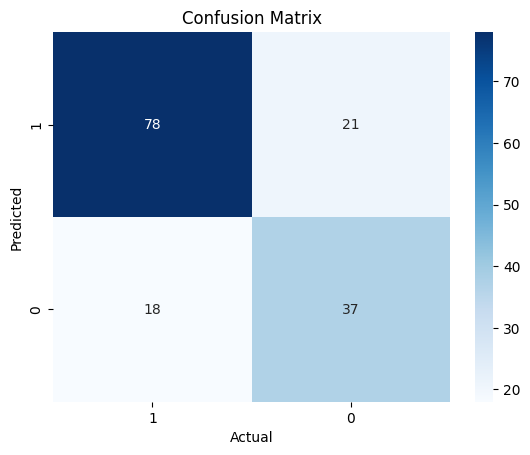

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Accuracy overall model --> 75%

# Precision
# when my model is saying someone has diabetes , how much you can trust on ML Model
# Precision = TP + FP / TP
# 81%

# Recall
# 79%

# Recall (Sensitivity): Of all the actual diabetes, how many did the model actually correctly identify?
# 78 -->  Larger

# actual dataset 100 were diabetic
# out of 100 / your ml model correctly identified how many ? --> 78